# Principal Component Analysis
<!--<badge>--><a href="https://colab.research.google.com/github/computiq-training/Machine_Learning_for_Climate_Change/blob/main/Week 06_ Unsupervised Machine Learning/02 PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->


Principal component analysis, or **PCA**, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

# Why use PCA?
By reducing the number of features, PCA can help:

* Reduce the risk of overfitting a model to noisy features.
* Speed-up the training of a machine learning algorithm
* Make simpler data vizualisations.



For example, the Iris dataset has 4 features… hard to plot a 4D graph.


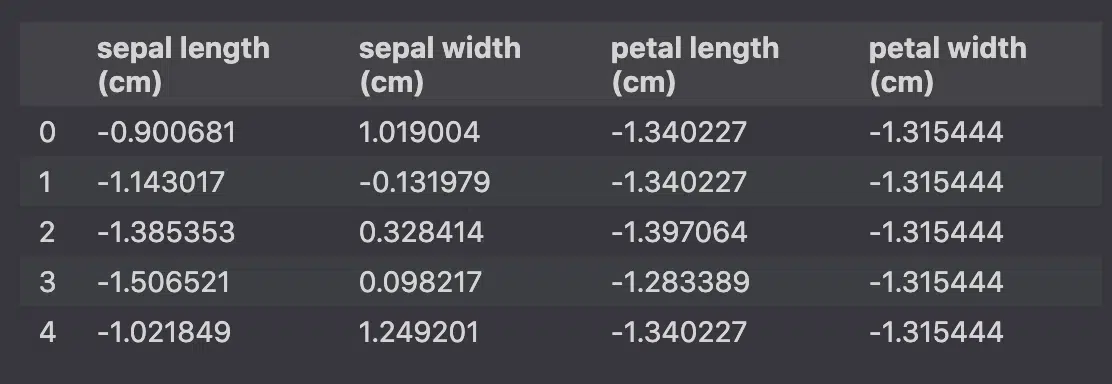

However, we can use PCA to reduce the number of features to 2 and plot on a 2D graph.



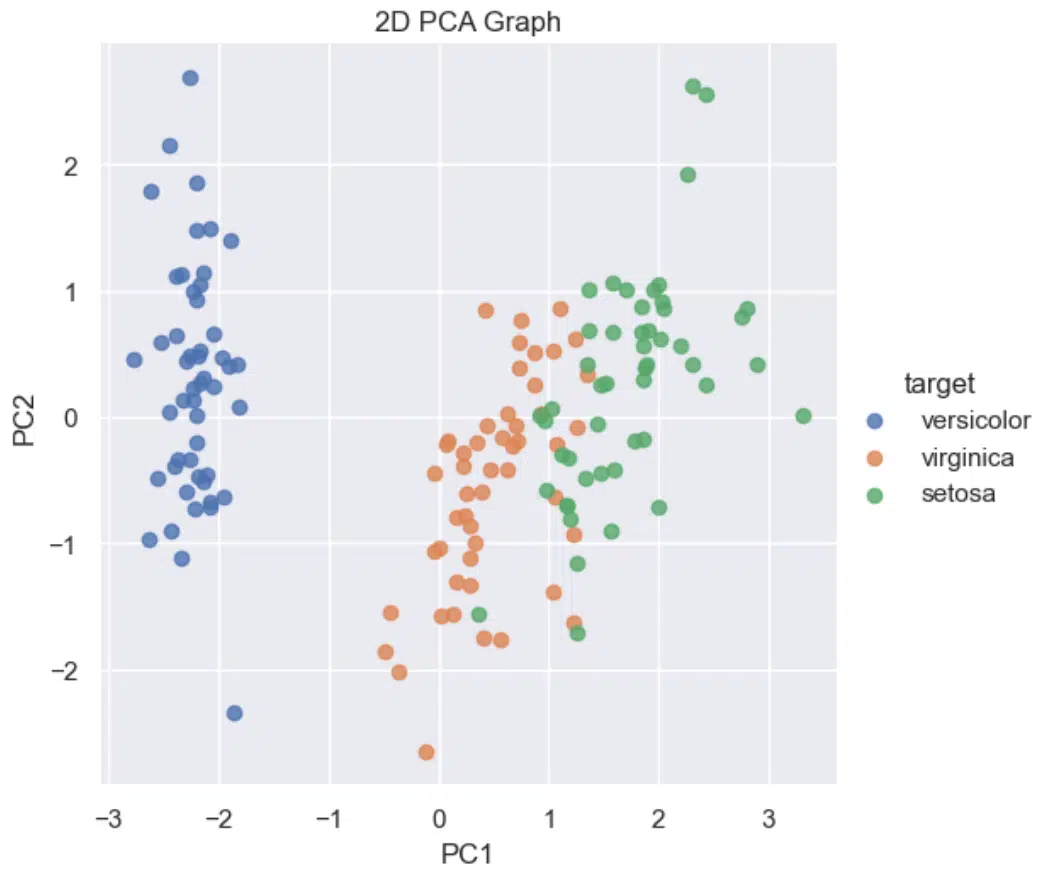

# How PCA Works? 
The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. PCA helps in finding a sequence of linear combinations of variables.


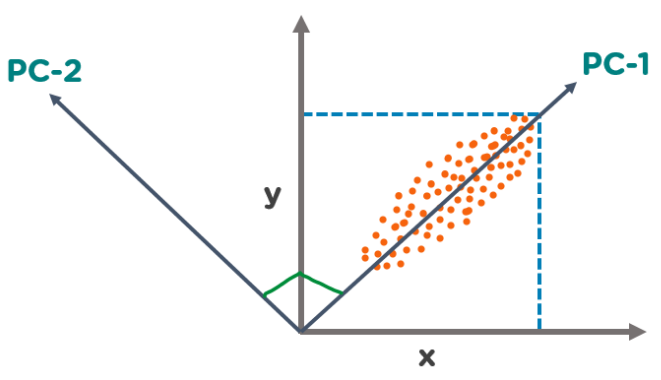

In the above figure, we have several points plotted on a 2-D plane. There are two principal components. PC1 is the primary principal component that explains the maximum variance in the data. PC2 is another principal component that is orthogonal to PC1.



# What is a Principal Component?

The Principal Components are a straight line that captures most of the variance of the data. They have a direction and magnitude. Principal components are orthogonal projections (perpendicular) of data onto lower-dimensional space.

Now that you have understood the basics of PCA, let’s look at the next topic on PCA in Machine Learning.

# How does Principal Component Analysis Work?
### 1. Normalize the data
Standardize the data before performing PCA. This will ensure that each feature has a mean = 0 and variance = 1.


### 2. Build the covariance matrix
Construct a square matrix to express the correlation between two or more features in a multidimensional dataset.


### 3. Find the Eigenvectors and Eigenvalues
Calculate the eigenvectors/unit vectors and eigenvalues. Eigenvalues are scalars by which we multiply the eigenvector of the covariance matrix.


### 4. Sort the eigenvectors in highest to lowest order and select the number of principal components.

# Import the Necessary Libraries


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import cluster, decomposition, metrics, preprocessing, datasets

# Get the Dataset

In [ ]:
data = datasets.load_iris()
dataset = pd.DataFrame(data.data,columns=data.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


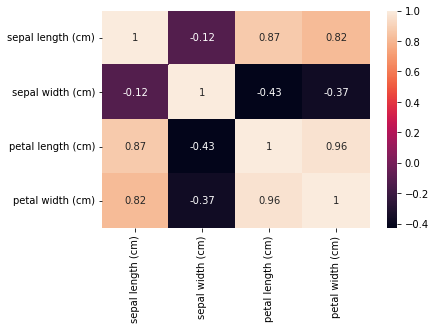

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

# Normalize the Data

In [ ]:
x_normalizer = preprocessing.StandardScaler()
x_norm = x_normalizer.fit_transform(dataset)

# PCA for Data Analysis

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(x_norm)

PCA(n_components=2)

In [ ]:
new_x = pca.transform(x_norm)

In [ ]:
new_dataset = pd.DataFrame(new_x,columns=['PCA1','PCA2'])
new_dataset

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


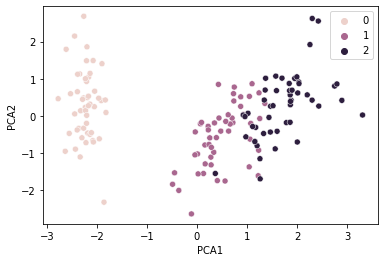

In [ ]:
sns.scatterplot(data=new_dataset,x='PCA1',y='PCA2',hue= data.target)

# PCA with Kmean

In [ ]:
kmean = cluster.KMeans(n_clusters=3)
kmean.fit(new_dataset)

KMeans(n_clusters=3)

In [ ]:
clusters = kmean.labels_

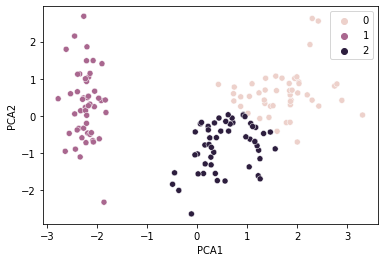

In [ ]:
sns.scatterplot(data=new_dataset,x='PCA1',y='PCA2',hue= clusters)

# Explained Variance Ratio
Another useful piece of information is the explained variance ratio of each principal
component, available via the `explained_variance_ratio_` variable. The ratio indicates the proportion of the dataset’s variance that lies along each principal component.

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

This output tells you that 72.9% of the dataset’s variance lies along the first PC, and
22.8% lies along the second PC.